<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Additive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Additive Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sales_data.csv')

In [ ]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [ ]:
df.dtypes

Years     object
Sales    float64
dtype: object

In [ ]:
df['Years'] = pd.to_datetime(df['Years'])

In [ ]:
df['year'] = df['Years'].dt.year
df['month_name'] = df['Years'].dt.month_name()


In [ ]:
df['year'].nunique()

6

In [ ]:
df['time'] = np.arange(1,73,1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Years       72 non-null     datetime64[ns]
 1   Sales       72 non-null     float64       
 2   month_name  72 non-null     object        
 3   time        72 non-null     int64         
 4   year        72 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.9+ KB


In [ ]:
df.head()

,Years,Sales,month_name,time,year
0,2001-01-01,139.7,January,1,2001
1,2001-02-01,114.3,February,2,2001
2,2001-03-01,101.6,March,3,2001
3,2001-04-01,152.4,April,4,2001
4,2001-05-01,215.9,May,5,2001


In [ ]:
df_train = df.head(n=48)
df_test = df.loc[48:]

In [ ]:
df_train.dtypes

Years         datetime64[ns]
Sales                float64
month_name            object
time                   int64
year                   int64
dtype: object

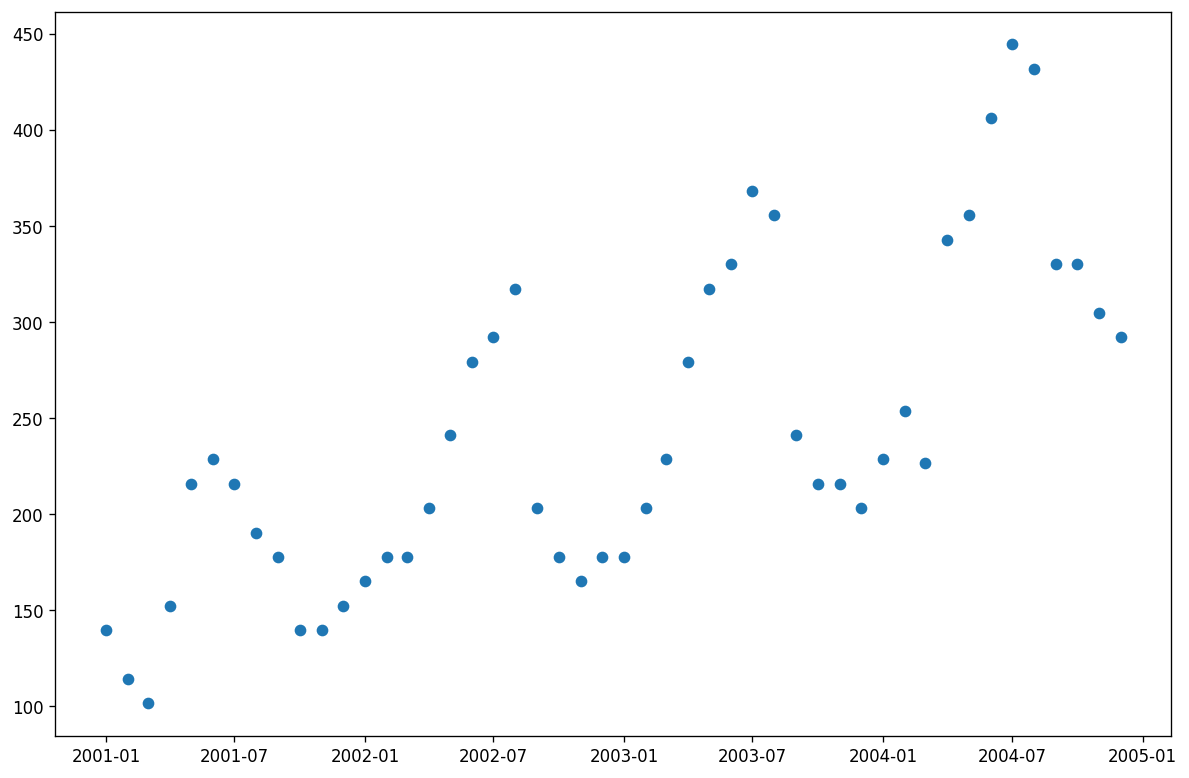

In [ ]:
plt.figure(figsize=(12,8),dpi=120)
plt.scatter(x=df_train['Years'],y=df_train['Sales'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


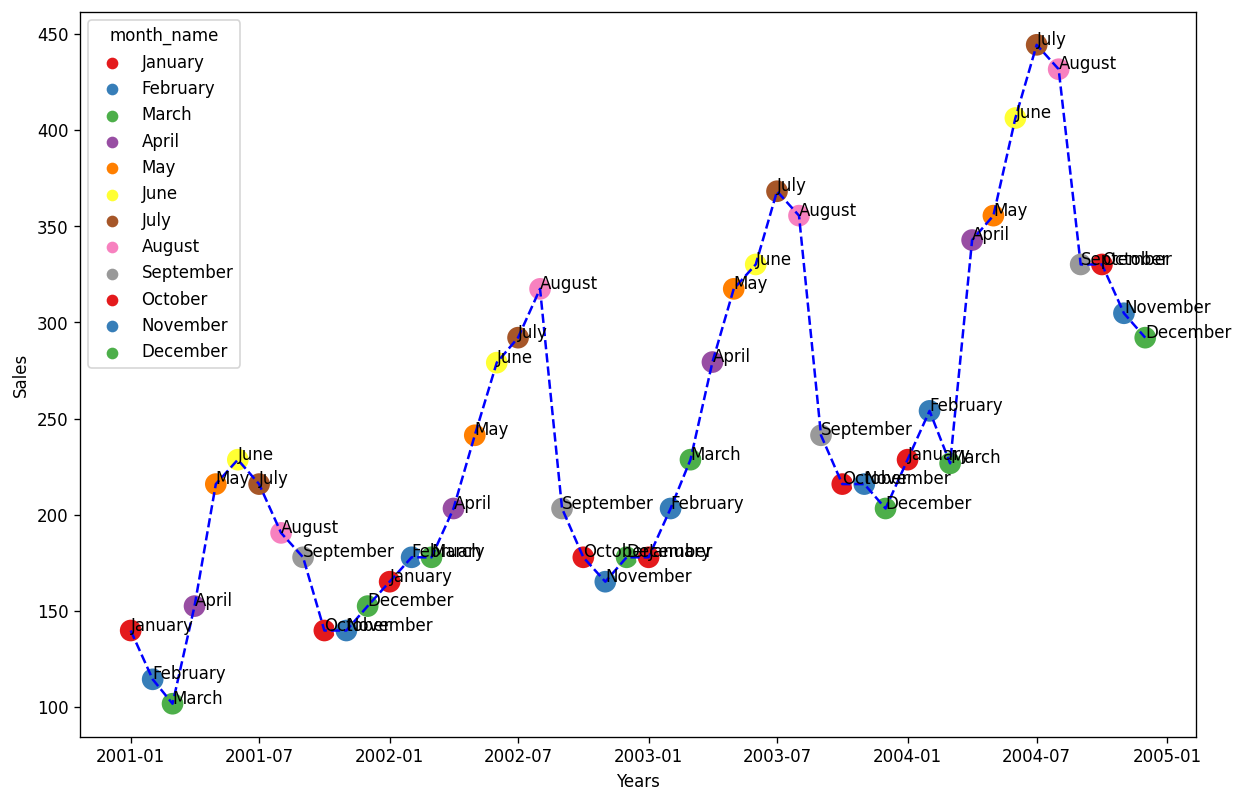

In [47]:
plt.figure(figsize=(12,8),dpi=120)
plt.plot(df_train['Years'],df_train['Sales'],'b--')
sns.scatterplot('Years','Sales',data=df_train,hue ='month_name',s=200, palette='Set1')

for i in range(len(df_train)):
  plt.text(df_train['Years'][i],df_train['Sales'][i],df['month_name'][i])
plt.show()


seasonality is 12, we need to create (n-1) dummies; so 11 columns

In [61]:
dum = pd.get_dummies(df_train['month_name'],drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1,dum),axis=1)


In [62]:
df_train1.head()

,Years,Sales,month_name,time,year,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,January,1,2001,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,February,2,2001,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,March,3,2001,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,April,4,2001,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,May,5,2001,0,0,0,0,0,0,0,1,0,0,0


In [64]:
dum = pd.get_dummies(df_test['month_name'],drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1,dum),axis=1)

In [65]:
df_test1.head()

,Years,Sales,month_name,time,year,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,January,49,2005,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,February,50,2005,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,March,51,2005,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,April,52,2005,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,May,53,2005,0,0,0,0,0,0,0,1,0,0,0


In [66]:
df_test1.columns

Index(['Years', 'Sales', 'month_name', 'time', 'year', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

Split the data into independent and dependent data

In [67]:
cols = ['time', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September']

In [68]:
X_train_add = df_train1[cols].values
X_test_add = df_test1[cols].values
y_train_add = df_train1['Sales'].values
y_test_add = df_test1['Sales'].values

In [69]:
X_train_add

array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [12,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [14,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [15,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [18,  0,  0,  0,  0,  0,

In [70]:
X_train_add.shape, X_test_add.shape,y_train_add.shape,y_test_add.shape

((48, 12), (24, 12), (48,), (24,))

In [71]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_add,y_train_add)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
#Fitted values
y_fittedvalues = model.predict(X_train_add)
#Forecasted values
y_forecast = model.predict(X_test_add)

In [74]:
error = y_train_add - y_fittedvalues
se = error.std()
ME = 1.96 * se

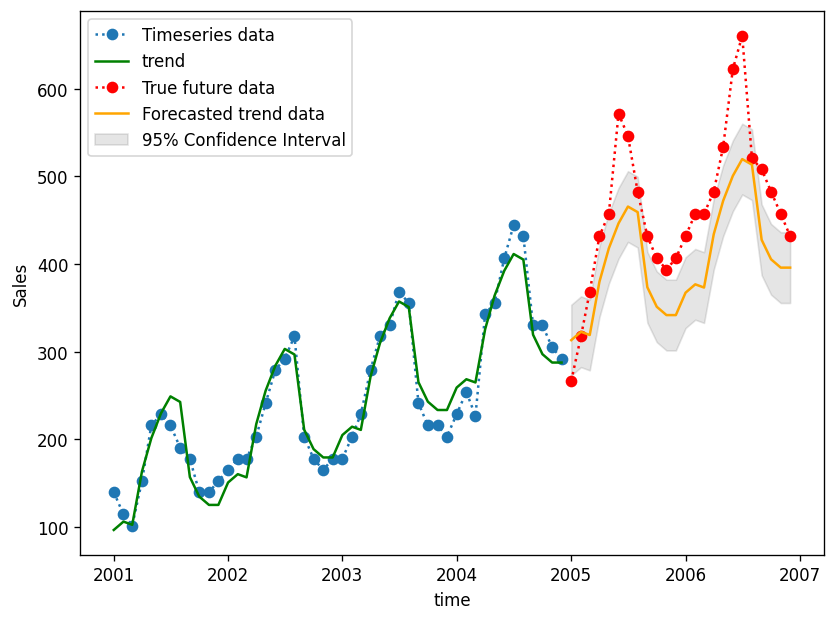

In [78]:
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df_train1['Years'],y_train_add,'o:')
plt.plot(df_train1['Years'],y_fittedvalues,'g')

plt.plot(df_test1['Years'],y_test_add,'ro:')
# Forecasted data
plt.plot(df_test1['Years'],y_forecast,'b',color='orange')
# Margin of data
ci_plus = y_forecast + ME
ci_minus = y_forecast - ME
plt.fill_between(df_test1['Years'],ci_plus,ci_minus,alpha=0.1, color='black' )
plt.legend(['Timeseries data','trend','True future data','Forecasted trend data','95% Confidence Interval'])

plt.xlabel('time')
plt.ylabel('Sales')

plt.show()